In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


ModuleNotFoundError: No module named 'wordcloud'

In [2]:
!pip install wordcloud

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   ------------ --------------------------- 92.2/301.2 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 2.7 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [4]:
file_path = "mail_data.csv" 
df = pd.read_csv(file_path)

In [5]:
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


C:\Users\SANKET\AppData\Local\Temp\ipykernel_9348\3514085105.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


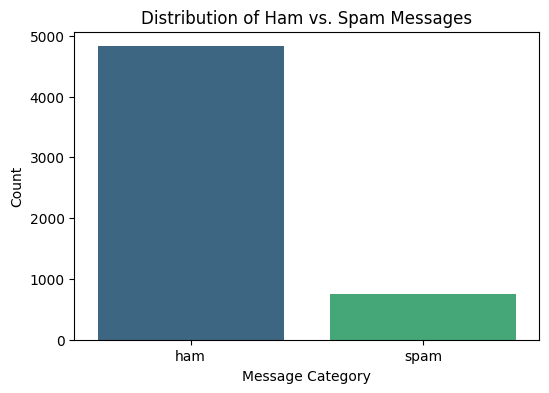

In [6]:
category_counts = df["Category"].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.xlabel("Message Category")
plt.ylabel("Count")
plt.title("Distribution of Ham vs. Spam Messages")
plt.show()

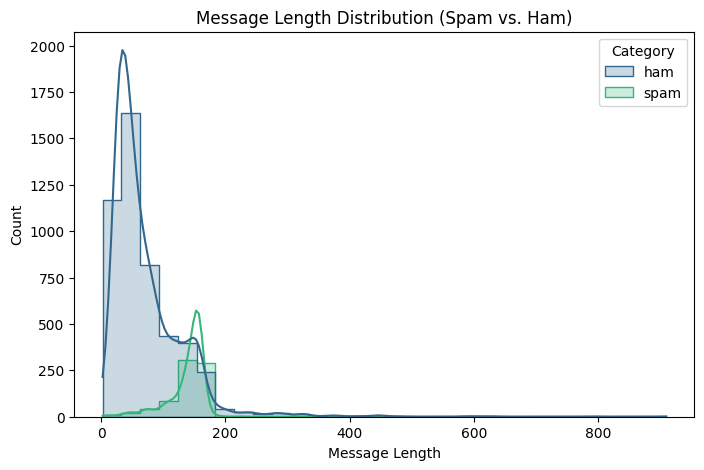

In [7]:
df["Message_Length"] = df["Message"].apply(len)

# Plot message length distribution
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Message_Length", hue="Category", bins=30, kde=True, palette="viridis", element="step")
plt.xlabel("Message Length")
plt.ylabel("Count")
plt.title("Message Length Distribution (Spam vs. Ham)")
plt.show()


C:\Users\SANKET\AppData\Local\Temp\ipykernel_9348\3330691213.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Category", y="Message_Length", data=df, palette="coolwarm")


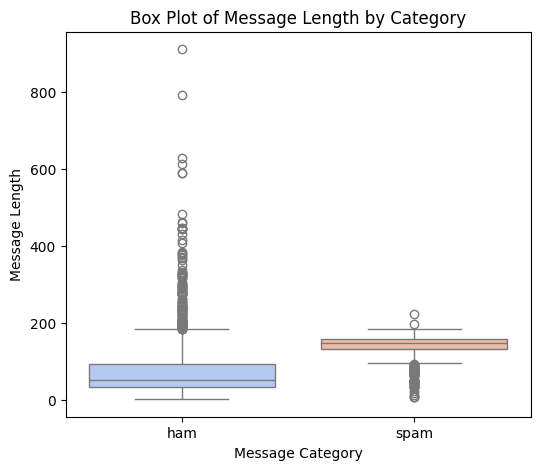

In [8]:
plt.figure(figsize=(6,5))
sns.boxplot(x="Category", y="Message_Length", data=df, palette="coolwarm")
plt.xlabel("Message Category")
plt.ylabel("Message Length")
plt.title("Box Plot of Message Length by Category")
plt.show()

C:\Users\SANKET\AppData\Local\Temp\ipykernel_9348\2650362195.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Category", y="Message_Length", data=df, palette="muted", inner="quartile")


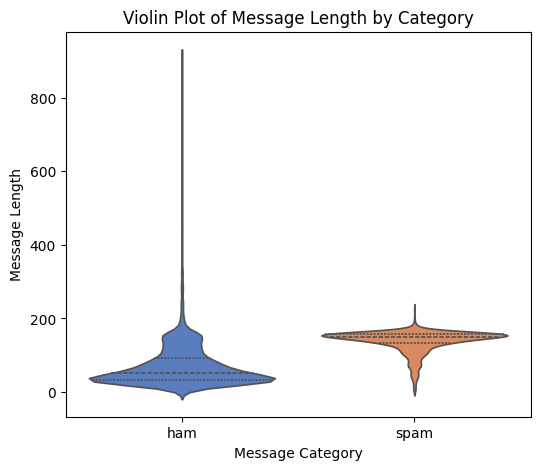

In [9]:
plt.figure(figsize=(6,5))
sns.violinplot(x="Category", y="Message_Length", data=df, palette="muted", inner="quartile")
plt.xlabel("Message Category")
plt.ylabel("Message Length")
plt.title("Violin Plot of Message Length by Category")
plt.show()

In [10]:
spam_messages = " ".join(df[df["Category"] == "spam"]["Message"])
ham_messages = " ".join(df[df["Category"] == "ham"]["Message"])

spam_wc = WordCloud(width=600, height=400, background_color="black", colormap="Reds").generate(spam_messages)
ham_wc = WordCloud(width=600, height=400, background_color="black", colormap="Blues").generate(ham_messages)

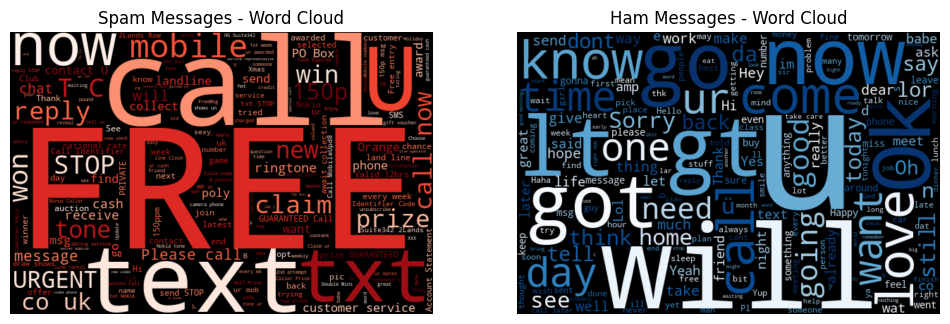

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(spam_wc, interpolation="bilinear")
ax[0].axis("off")
ax[0].set_title("Spam Messages - Word Cloud", fontsize=12)

ax[1].imshow(ham_wc, interpolation="bilinear")
ax[1].axis("off")
ax[1].set_title("Ham Messages - Word Cloud", fontsize=12)

plt.show()

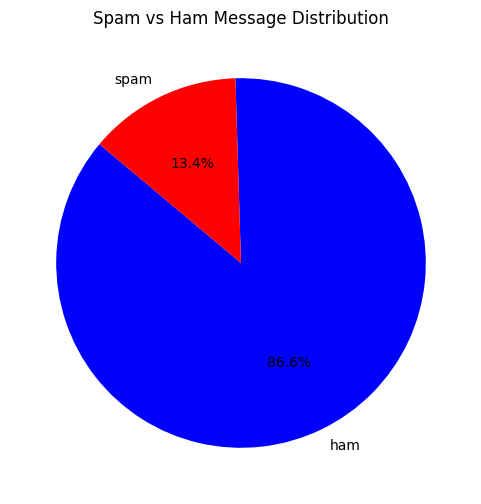

In [12]:
plt.figure(figsize=(6,6))
plt.pie(category_counts, labels=category_counts.index, autopct="%1.1f%%", colors=["blue", "red"], startangle=140)
plt.title("Spam vs Ham Message Distribution")
plt.show()


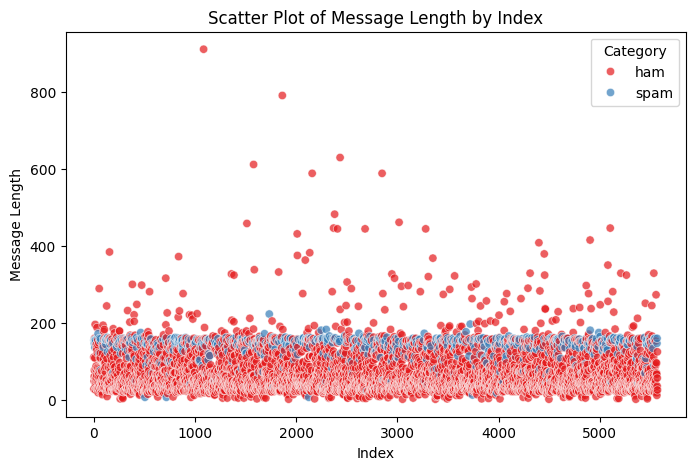

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=range(len(df)), y=df["Message_Length"], hue=df["Category"], alpha=0.7, palette="Set1")
plt.xlabel("Index")
plt.ylabel("Message Length")
plt.title("Scatter Plot of Message Length by Index")
plt.show()